In [204]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

TRAIN_DIR =r'C:\Users\Gabi\Desktop\train'
TEST_DIR = r'C:\Users\Gabi\Desktop\test'
IMG_SIZE = 50
LR = 1e-3



In [205]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return 0
    elif word_label == 'dog': return 1

In [206]:
def creat_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data

In [170]:
train_data = creat_train_data()

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [11:21<00:00, 36.68it/s]
C:\Users\Gabi\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [213]:
X = train_data.data[:800]

AttributeError: 'list' object has no attribute 'data'

In [228]:
X = np.array([i[0] for i in train_data]).reshape(25000,2500)
Y = [i[1] for i in train_data]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.2, random_state=42)

In [199]:
pca = PCA()
X2D = pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [200]:
d

772

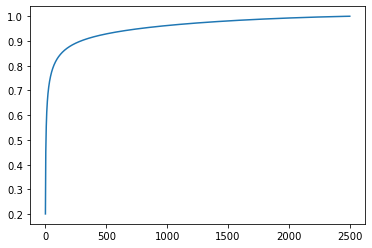

In [201]:
plt.plot(cumsum)

In [209]:
from sklearn.decomposition import IncrementalPCA
n_batches = 40
inc_pca = IncrementalPCA(n_components=772)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_train = inc_pca.transform(X_train)


ValueError: n_components=772 must be less or equal to the batch number of samples 500.

In [230]:
pca = PCA(n_components=772)
pca.fit(X_train)
X_train = pca.transform(X_train)

In [231]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [233]:
X_test = pca.transform(X_test)
X_test = sc.fit_transform(X_test)

In [94]:
print(X)

[[255 255 255 ... 255 255 255]
 [ 10  11  22 ...  80  76  69]
 [126 101 110 ... 202 220 213]
 ...
 [155 155 144 ...  50  35 123]
 [189 197 193 ... 151 152 153]
 [ 53  95 100 ...   8   9   6]]


In [95]:
print(Y)

[array(0), array(1), array(0), array(0), array(1), array(0), array(0), array(0), array(0), array(0), array(0), array(1), array(1), array(1), array(0), array(0), array(0), array(1), array(0), array(0), array(0), array(1), array(1), array(0), array(1), array(0), array(0), array(1), array(1), array(0), array(1), array(0), array(1), array(0), array(1), array(0), array(0), array(0), array(1), array(1), array(0), array(1), array(0), array(0), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(0), array(0), array(0), array(0), array(1), array(0), array(1), array(0), array(0), array(1), array(1), array(0), array(1), array(0), array(0), array(0), array(1), array(1), array(1), array(1), array(1), array(1), array(0), array(1), array(1), array(0), array(0), array(1), array(0), array(0), array(0), array(1), array(0), array(1), array(0), array(1), array(1), array(0), array(1), array(1), array(0), array(0), array(1), array(1), array(1), array(1), array(0), array(1), array(0),

In [234]:
xgb_reg = xgb.XGBClassifier(eval_metric = 'mlogloss')
xgb_reg.fit(X_train, y_train)

C:\Users\Gabi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [235]:
xgb_reg.score(X_test, y_test)

0.603

In [154]:
err_rate=[] 
for i in range(1,100):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    bestK=k.predict(X_test)
    err_rate.append(np.mean(bestK != y_test))

Text(0, 0.5, 'Accuracy')

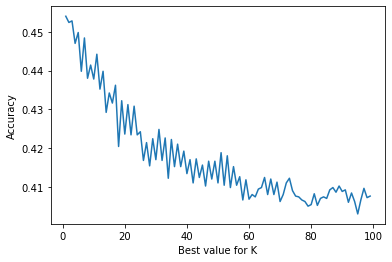

In [155]:
plt.plot(range(1,100),err_rate)
plt.xlabel('Best value for K')
plt.ylabel('Accuracy')

In [236]:
from sklearn.ensemble import BaggingClassifier
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=95),
                      n_estimators=10, random_state=0).fit(X_train, y_train)

In [238]:
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5014


In [237]:
ranfor = BaggingClassifier(base_estimator=RandomForestClassifier(),
                      n_estimators=10, random_state=0).fit(X_train, y_train)

In [239]:
from sklearn.ensemble import AdaBoostClassifier
ad =AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')

In [240]:
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [241]:
ad.predict(X_test)
ad.score(X_test,y_test)

0.5974

In [242]:
clf77= BaggingClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)

In [243]:
dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=10, random_state=0).fit(X_train, y_train)

In [244]:
from sklearn.metrics import accuracy_score

In [245]:
voting_clf = VotingClassifier(
 estimators=[('xg', xgb_reg ), ('cf', clf77),('ad', ad),('rn',ranfor),('dt',dt)],
 voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

C:\Users\Gabi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6042


In [246]:
estimators = [('xg', xgb_reg ), ('cf', clf77),('ad', ad),('rn',ranfor),('dt',dt)]

In [247]:
from sklearn.ensemble import StackingClassifier

In [248]:
lala = StackingClassifier(
   estimators=estimators, final_estimator=knn)

In [ ]:
lala.fit(X_train, y_train).score(X_test, y_test)

C:\Users\Gabi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gabi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
